# Chaper-9 Unsupervised Learning Techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

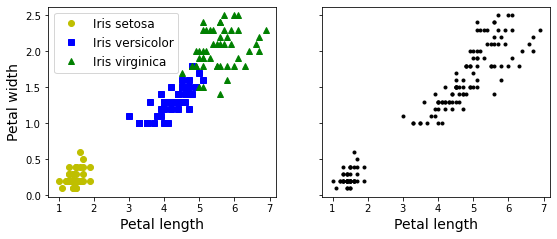

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

A Gaussian mixture model (explained below) can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

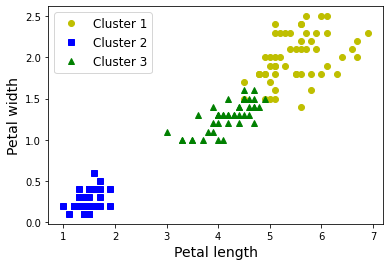

In [6]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

## K-Means

The K-Means algorithm is a simple algorithm capable of clustering
this kind of dataset very quickly and efficiently, often in just a few iterations.

In [7]:
from sklearn.datasets import make_blobs

In [8]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [9]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [10]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

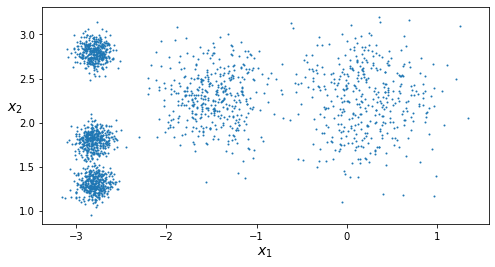

In [11]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [12]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

In [14]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

In [15]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

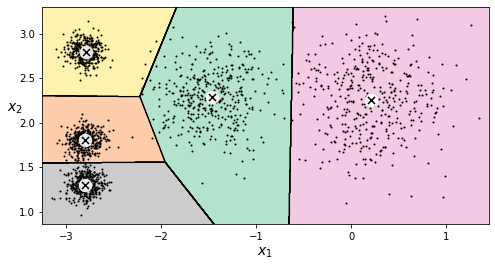

In [16]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

just start by placing the centroids randomly (e.g., by picking k instances at
random and using their locations as centroids). Then label the instances, update the
centroids, label the instances, update the centroids, and so on until the centroids stop
moving. The algorithm is guaranteed to converge in a finite number of steps (usually
quite small); it will not oscillate forever.

Although the algorithm is guaranteed to converge, it may not converge to the right
solution (i.e., it may converge to a local optimum): whether it does or not depends on
the centroid initialization.

### Centroid Initialization Methods

if you happen to know approximately where the centroids should be (e.g., if you ran
another clustering algorithm earlier), then you can set the init hyperparameter to a
NumPy array containing the list of centroids, and set n_init to 1 :

Another solution is to run the algorithm multiple times with different random initial‐
izations and keep the best solution. The number of random initializations is con‐
trolled by the n_init hyperparameter: by default, it is equal to 10 , which means that
the whole algorithm described earlier runs 10 times when you call fit() , and Scikit-
Learn keeps the best solution. But how exactly does it know which solution is the
best? It uses a performance metric! That metric is called the model’s inertia, which is
the mean squared distance between each instance and its closest centroid. It is
roughly equal to 223.3 for the model on the left in Figure 9-5, 237.5 for the model on
the right in Figure 9-5, and 211.6 for the model in Figure 9-3. The KMeans class runs
the algorithm n_init times and keeps the model with the lowest inertia.

### Accelerated K-Means and mini-batch K-Means

It considerably accelerates the algorithm by avoiding many
unnecessary distance calculations. Elkan achieved this by exploiting the triangle
inequality (i.e., that a straight line is always the shortest distance between two points 5 )
and by keeping track of lower and upper bounds for distances between instances and
centroids. This is the algorithm the KMeans class uses by default (you can force it to
use the original algorithm by setting the algorithm hyperparameter to "full" ,
although you probably will never need to)

Yet another important variant of the K-Means algorithm was proposed in a 2010
paper by David Sculley. 6 Instead of using the full dataset at each iteration, the algo‐
rithm is capable of using mini-batches, moving the centroids just slightly at each iter‐
ation. This speeds up the algorithm typically by a factor of three or four and makes it
possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements
this algorithm in the MiniBatchKMeans class. You can just use this class like the
KMeans class:

In [17]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

### Finding the optimal number of clusters

Indeed, the more clusters there are, the closer each
instance will be to its closest centroid, and therefore the lower the inertia will be. Let’s
plot the inertia as a function of k

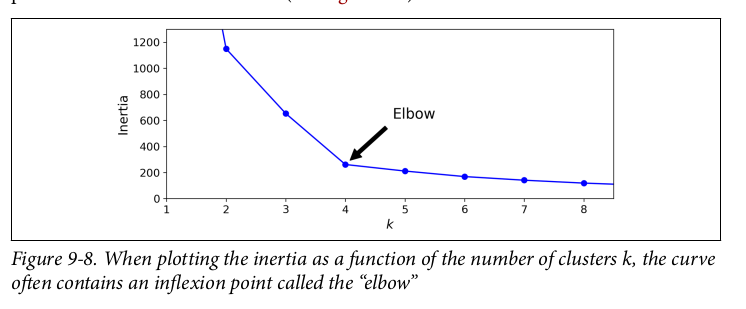

As you can see, the inertia drops very quickly as we increase k up to 4, but then it
decreases much more slowly as we keep increasing k. This curve has roughly the
shape of an arm, and there is an “elbow” at k = 4. So, if we did not know better, 4
would be a good choice: any lower value would be dramatic, while any higher value
would not help much, and we might just be splitting perfectly good clusters in half for
no good reason.
This technique for choosing the best value for the number of clusters is rather coarse.

A more precise approach (but also more computationally expensive) is to use the
silhouette score, which is the mean silhouette coefficient over all the instances.
An instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean
distance to the other instances in the same cluster (i.e., the mean intra-cluster dis‐
tance) and b is the mean nearest-cluster distance (i.e., the mean distance to the
instances of the next closest cluster, defined as the one that minimizes b, excluding
the instance’s own cluster). The silhouette coefficient can vary between –1 and +1. A
coefficient close to +1 means that the instance is well inside its own cluster and far
from other clusters, while a coefficient close to 0 means that it is close to a cluster
boundary, and finally a coefficient close to –1 means that the instance may have been
assigned to the wrong cluster.
To compute the silhouette score, you can use Scikit-Learn’s silhouette_score()
function, giving it all the instances in the dataset and the labels they were assigned:

In [18]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [19]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

In [20]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

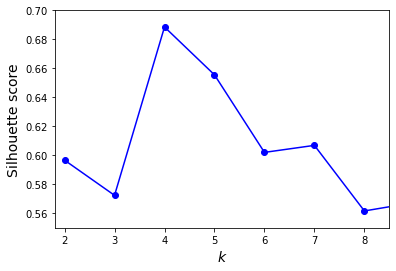

In [21]:
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

An even more informative visualization is obtained when you plot every instance’s
silhouette coefficient, sorted by the cluster they are assigned to and by the value of the
coefficient. This is called a silhouette diagram (see Figure 9-10). Each diagram con‐
tains one knife shape per cluster. The shape’s height indicates the number of instances
the cluster contains, and its width represents the sorted silhouette coefficients of the
instances in the cluster (wider is better). The dashed line indicates the mean silhou‐
ette coefficient.

## Limits of K-Means

Despite its many merits, most notably being fast and scalable, K-Means is not perfect.
As we saw, it is necessary to run the algorithm several times to avoid suboptimal solu‐
tions, plus you need to specify the number of clusters, which can be quite a hassle.
Moreover, K-Means does not behave very well when the clusters have varying sizes,different densities, or nonspherical shapes.

## Using Clustering for Image Segmentation

Image segmentation is the task of partitioning an image into multiple segments. In
semantic segmentation, all pixels that are part of the same object type get assigned to
the same segment.

The image is represented as a 3D array. The first dimension’s size is the height; the
second is the width; and the third is the number of color channels, in this case red,
green, and blue (RGB). In other words, for each pixel there is a 3D vector containing
the intensities of red, green, and blue, each between 0.0 and 1.0 (or between 0 and
255, if you use imageio.imread() ). Some images may have fewer channels, such as
grayscale images (one channel). And some images may have more channels, such as
images with an additional alpha channel for transparency or satellite images, which
often contain channels for many light frequencies (e.g., infrared).

For example, it may identify a color cluster for all shades of green. Next, for each
color (e.g., dark green), it looks for the mean color of the pixel’s color cluster. For
example, all shades of green may be replaced with the same light green color (assum‐
ing the mean color of the green cluster is light green). Finally, it reshapes this long list
of colors to get the same shape as the original image. And we’re done!

## Using Clustering fro Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a
preprocessing step before a supervised learning algorithm. As an example of using
clustering for dimensionality reduction, let’s tackle the digits dataset, which is a sim‐
ple MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing the dig‐
its 0 to 9. First, load the dataset:

In [22]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/surik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
log_reg.score(X_test, y_test)

0.9622222222222222

In [26]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=50)),
("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

/home/surik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [27]:
pipeline.score(X_test, y_test)

0.9555555555555556

## Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty
of unlabeled instances and very few labeled instances. Let’s train a Logistic Regression
model on a sample of 50 labeled instances from the digits dataset:

## DBSCAN

This algorithm defines clusters as continuous regions of high density. Here is how it
works:
* For each instance, the algorithm counts how many instances are located within a
small distance ε (epsilon) from it. This region is called the instance’s ε-
neighborhood.
* If an instance has at least min_samples instances in its ε-neighborhood (includ‐
ing itself), then it is considered a core instance. In other words, core instances are
those that are located in dense regions.
* All instances in the neighborhood of a core instance belong to the same cluster.
This neighborhood may include other core instances; therefore, a long sequence
of neighboring core instances forms a single cluster.
* Any instance that is not a core instance and does not have one in its neighbor‐
hood is considered an anomaly.

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [29]:
dbscan.labels_

array([ 0,  1,  2,  0,  2,  2,  3,  4,  2,  0,  0,  3,  2,  5,  3, -1,  3,
        2,  0,  3,  3,  2,  0,  2,  2, -1,  0,  6, -1,  2,  3,  5,  1,  6,
        5,  3,  2,  3,  1,  5,  3,  5,  4,  6,  2,  6, -1,  1,  4,  0,  7,
        2,  4,  4,  4,  4,  5,  4, -1,  7,  1,  8,  0,  3,  7, -1,  5,  3,
        4, -1,  3,  3,  2,  6,  2, 10, -1,  2,  5,  1,  7, -1,  5,  6,  4,
        7,  1,  2, -1,  7,  1,  2,  1, -1,  8,  3,  3,  1,  7,  0,  2,  2,
        7, -1,  6,  1,  9,  1,  1,  2,  3,  2,  3,  0,  6,  5,  5, 10,  2,
        6,  3,  7,  3,  0,  9,  3,  7,  3,  1,  1,  3,  2,  4,  5,  3,  2,
       10,  3,  3,  4,  1,  1,  4, 10,  3,  7,  5, -1, -1,  3,  3,  2,  5,
        6,  3,  3,  2,  7,  9,  3,  2,  3,  8,  2,  2,  4,  7,  1,  4,  5,
        3,  2,  1,  2,  2, -1,  1,  3,  0,  0,  2, -1,  0,  5,  3, -1,  3,
        4,  3,  7,  5,  8,  4,  1,  1,  1,  0,  6,  7,  4,  2,  6,  4,  2,
        6, 10,  2,  2,  3,  3,  0,  1,  3,  2,  5,  4,  8,  0,  3,  6,  8,
        5,  6,  0,  2,  5

Notice that some instances have a cluster index equal to –1, which means that they
are considered as anomalies by the algorithm. The indices of the core instances are
available in the core_sample_indices_ instance variable, and the core instances
themselves are available in the components_ instance variable:

In [30]:
len(dbscan.core_sample_indices_)

800

In [31]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
        14,  16,  17,  18,  22,  23,  24,  26,  27,  29,  30,  31,  32,
        33,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  47,  48,
        49,  50,  52,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,
        64,  67,  68,  70,  71,  72,  73,  74,  77,  78,  79,  80,  82,
        83,  84,  85,  86,  87,  89,  90,  91,  94,  95,  96,  98, 102,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117,
       118, 119, 121, 122, 123, 124, 125, 126, 128, 130, 131, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 149,
       150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 171, 172, 174, 176, 177, 179, 180,
       183, 184, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

In [32]:
dbscan.components_

array([[ 0.84168504,  0.45827624],
       [ 1.68607635, -0.14014833],
       [ 0.74121465, -0.51516752],
       ...,
       [ 0.56735566,  0.83398025],
       [-0.30491458,  0.95145507],
       [ 1.21724074, -0.45999138]])

Somewhat surprisingly, the DBSCAN class does not have a predict() method, although
it has a fit_predict() method. In other words, it cannot predict which cluster a new
instance belongs to. This implementation decision was made because different classi‐
fication algorithms can be better for different tasks, so the authors decided to let the
user choose which one to use. Moreover, it’s not hard to implement. For example, let’s
train a KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [34]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([ 3,  5, 10,  6])

In [35]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.  , 0.42, 0.  , 0.2 , 0.  , 0.  , 0.  , 0.38, 0.  ],
       [0.  , 0.  , 0.  , 0.02, 0.  , 0.66, 0.  , 0.  , 0.32, 0.  , 0.  ],
       [0.18, 0.  , 0.3 , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.5 ],
       [0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.96, 0.  , 0.  , 0.  , 0.  ]])

## Gaussian Mixtures

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the
instances were generated from a mixture of several Gaussian distributions whose
parameters are unknown. All the instances generated from a single Gaussian distri‐
bution form a cluster that typically looks like an ellipsoid. Each cluster can have a dif‐
ferent ellipsoidal shape, size, density, and orientation,

There are several GMM variants. In the simplest variant, implemented in the Gaus
sianMixture class, you must know in advance the number k of Gaussian distribu‐
tions. The dataset X is assumed to have been generated through the following
probabilistic process:
* For each instance, a cluster is picked randomly from among k clusters. The prob‐
ability of choosing the j th cluster is defined by the cluster’s weight, φ (j) . 7 The index
of the cluster chosen for the i th instance is noted z (i) .
* If z (i) =j, meaning the i th instance has been assigned to the j th cluster, the location
x (i) of this instance is sampled randomly from the Gaussian distribution with
mean μ (j) and covariance matrix Σ (j) . This is noted x i ∼ � μ j , Σ j .

In [36]:
from  sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [37]:
gm.weights_

array([0.61191766, 0.19561114, 0.1924712 ])

In [38]:
gm.means_

array([[ 0.50373618,  0.24354765],
       [-0.76378357,  0.54471975],
       [ 1.76929919, -0.03927262]])

In [39]:
gm.covariances_

array([[[ 0.18473598, -0.11981121],
        [-0.11981121,  0.29596161]],

       [[ 0.04418625,  0.05529493],
        [ 0.05529493,  0.08511669]],

       [[ 0.04369662,  0.05542684],
        [ 0.05542684,  0.08423201]]])

In [40]:
gm.converged_

True

In [41]:
gm.n_iter_

19

In [42]:
gm.predict(X)

array([0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,

In [43]:
gm.predict_proba(X)

array([[1.00000000e+000, 1.39033549e-072, 5.60879512e-048],
       [6.82762545e-003, 4.36141714e-222, 9.93172375e-001],
       [1.00000000e+000, 3.36002376e-129, 7.78249022e-016],
       ...,
       [1.00000000e+000, 4.19222068e-017, 1.11427602e-138],
       [9.90638078e-001, 1.24875672e-180, 9.36192190e-003],
       [9.79001290e-001, 1.60068120e-184, 2.09987098e-002]])

A Gaussian mixture model is a generative model, meaning you can sample new
instances from it (note that they are ordered by cluster index):

In [44]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.05138026,  0.50789412],
       [ 0.73869693, -0.25814675],
       [ 0.36463476, -0.3153289 ],
       [-0.81691797,  0.31443175],
       [ 1.62544793, -0.2377849 ],
       [ 1.92466218,  0.18703556]])

In [45]:
y_new

array([0, 0, 0, 1, 2, 2])

It is also possible to estimate the density of the model at any given location. This is
achieved using the score_samples() method: for each instance it is given, this method estimates the log of the probability density function (PDF) at that location.
The greater the score, the higher the density:

In [46]:
gm.score_samples(X)

array([-1.46401003e+00,  1.43365159e-01, -1.71389877e+00, -1.62786967e+00,
       -1.80280748e+00, -1.71061995e+00, -6.78367848e-01, -1.57530387e+00,
       -1.47011065e+00, -1.50334265e+00, -1.52853831e+00, -1.88680433e+00,
       -1.41627730e+00, -1.52316072e+00, -2.03685187e+00, -1.15438347e+00,
       -1.71862105e+00, -1.73902084e+00, -1.81582868e+00, -2.91980114e-01,
       -1.19808366e-02, -1.99781499e+00, -1.46435749e+00, -1.81163058e+00,
       -1.91105492e+00, -2.27278174e+00, -1.52958868e+00, -2.42321662e-01,
       -6.24018736e-01, -1.85262015e+00, -5.46184824e-01, -1.49461390e+00,
        1.52398943e-01, -4.74689004e-01, -1.37116152e+00, -2.21599269e+00,
       -2.08636660e+00, -2.03376454e-01, -4.49989989e-01, -1.79162573e+00,
        7.69035895e-02, -1.77702402e+00, -1.78655217e+00, -1.86406193e+00,
       -1.51612032e+00, -7.37391894e-01, -1.22673182e+00,  4.00397565e-03,
       -1.68441860e+00, -1.59487924e+00, -2.23933058e+00, -1.53668283e+00,
       -1.38395475e+00, -

When there are many dimensions, or many
clusters, or few instances, EM can struggle to converge to the optimal solution. You
might need to reduce the difficulty of the task by limiting the number of parameters
that the algorithm has to learn. One way to do this is to limit the range of shapes and
orientations that the clusters can have. This can be achieved by imposing constraints
on the covariance matrices. To do this, set the covariance_type hyperparameter to
one of the following values:
* "spherical" All clusters must be spherical, but they can have different diameters (i.e., different variances).
* "diag"Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).
* "tied"All clusters must have the same ellipsoidal shape, size, and orientation (i.e., all clusters share the same covariance matrix).

## Anomaly Detection Using Gaussian Mixtures

Anomaly detection (also called outlier detection) is the task of detecting instances that
deviate strongly from the norm. These instances are called anomalies, or outliers,
while the normal instances are called inliers

any instance located in a low-density region can be considered an anomaly. You must define what density threshold you want to use.

Here is how you would identify the outliers using the fourth percentile lowest density
as the threshold (i.e., approximately 4% of the instances will be flagged as anomalies):

In [47]:
densities = gm.score_samples(X)

density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [49]:
anomalies

array([[ 0.11293777, -0.20713882],
       [-0.19753809,  0.98929921],
       [ 1.22783583, -0.46930411],
       [ 1.97471942, -0.06386161],
       [ 1.23399591, -0.45370092],
       [ 1.27718528, -0.44758656],
       [ 2.15672965,  0.30765175],
       [ 2.03516983,  0.51809363],
       [ 1.27946923, -0.42608345],
       [ 1.25017867, -0.47039309],
       [-0.88057619, -0.01039664],
       [ 1.26115991, -0.46339234],
       [ 1.23195369, -0.44602106],
       [-0.95579051,  0.02243287],
       [ 1.98770678,  0.60988259],
       [-0.16685545,  1.06090242],
       [-0.89721581,  0.10626647],
       [ 1.99631467,  0.53526413],
       [ 1.13427255,  0.38040975],
       [ 1.8803865 ,  0.46868902],
       [-0.27163893,  0.78292771],
       [-0.25262628,  0.96029335],
       [ 1.25148229, -0.47944567],
       [-0.24868788,  0.9874549 ],
       [ 1.32234988, -0.38976954],
       [ 1.22983964, -0.46892075],
       [-0.34736961,  0.83216524],
       [-0.20447953,  0.98766364],
       [-0.91667649,

Just like K-Means, the GaussianMixture algorithm requires you to specify the number of clusters. So, how can you find it?

## Selecting the Number of Clusters

Try to find the model that minimizes a theoretical information criterion, such as the Bayesian information criterion (BIC) or the Akaike information criterion (AIC)

BIC = log(m)p - 2log(L^)

AIC = 2p - 2log(L^)

In these equations:
* m is the number of instances, as always.
* p is the number of parameters learned by the model.
* L is the maximized value of the likelihood function of the model.

Given a statistical model with some parameters θ, the word “probability” is used to describe how plausible a future outcome x is (knowing the parameter values θ), while the word “likelihood” is used to describe how plausible a particular set of parameter values θ
are, after the outcome x is known.

In short, the PDF is a function of x (with θ fixed), while the likelihood function is a
function of θ (with x fixed)

Given a dataset X, a common task is to try to estimate the most likely values for the
model parameters. To do this, you must find the values that maximize the likelihood
function, given X. In this example, if you have observed a single instance x=2.5, the
maximum likelihood estimate (MLE) of θ is θ =1.5. If a prior probability distribution g
over θ exists, it is possible to take it into account by maximizing L(θ|x)g(θ) rather
than just maximizing L(θ|x). This is called maximum a-posteriori (MAP) estimation.
Since MAP constrains the parameter values, you can think of it as a regularized ver‐
sion of MLE.

In [50]:
gm.bic(X)

2738.302711972055

In [51]:
gm.aic(X)

2654.8708722293586

In [52]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [53]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

Text(0.5, 1.0, 'AIC and BIC for different numbers of clusters k')

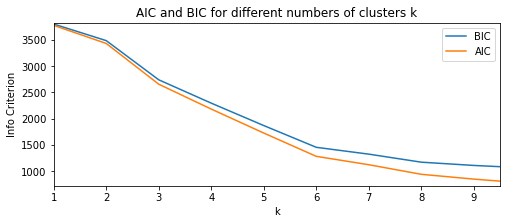

In [58]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, label="BIC")
plt.plot(range(1, 11), aics, label="AIC")
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.xlabel("k")
plt.ylabel("Info Criterion")
plt.legend()
plt.title("AIC and BIC for different numbers of clusters k")

## Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, you can use the BayesianGaussianMixture class, which is capable of giving weights equal (or close) to zero to unnecessary clusters. Set the number of clusters n_components to a value that you have good reason to believe is greater than the optimal number of clusters the algo rithm will eliminate the unnecessary clusters automatically. For example, let’s set the number of clusters to 10 and see what happens:

In [59]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.11, 0.12, 0.16, 0.13, 0.16, 0.12, 0.11, 0.09, 0.  , 0.  ])

The algorithm automatically detected that only three clusters are needed, and the resulting clusters are almost identical to the ones that we predicted before

In this model, the cluster parameters (including the weights, means, and covariance
matrices) are not treated as fixed model parameters anymore, but as latent random
variables, like the cluster assignments

So z now includes both the
cluster parameters and the cluster assignments.

The Beta distribution is commonly used to model random variables whose values lie
within a fixed range. In this case, the range is from 0 to 1. The Stick-Breaking Process
(SBP) is best explained through an example: suppose Φ=[0.3, 0.6, 0.5,...], then 30% of
the instances will be assigned to cluster 0, then 60% of the remaining instances will be
assigned to cluster 1, then 50% of the remaining instances will be assigned to cluster
2, and so on. This process is a good model for datasets where new instances are more
likely to join large clusters than small clusters

Prior knowledge about the latent variables z can be encoded in a probability distribu‐
tion p(z) called the prior. For example, we may have a prior belief that the clusters are
likely to be few (low concentration), or conversely, that they are likely to be plentiful
(high concentration). This prior belief about the number of clusters can be adjusted
using the weight_concentration_prior hyperparameter.